# <p style="text-align: center; color: #1A5276; font-family: 'Segoe UI', Arial; font-weight: bold; font-size: 32px; margin-bottom: 0px;">📊 HUMAN RESOURCES DATA ANALYTICS REPORT</p>
### <p style="text-align: center; color: #5499C7; font-family: 'Segoe UI', Arial; margin-top: 5px;">Week 3: Advanced Data Cleaning, Preparation & HR KPIs</p>

---

<div style="background-color: #F4F6F7; padding: 20px; border-radius: 10px; border-left: 8px solid #1A5276;">

### 👥 Project Team: Data Drifters
* 👤 **Thato Msina**
* 👤 **Fikile Noyila**
* 👤 **Lesedi Mphachake**
* 👤 **Jereshan Sinan**
* 👤 **Kaylene Martins**

</div>

---

### 📖 1. Project Overview
This technical report documents the end-to-end data engineering workflow for the **Week 3 Employee Dataset**. The primary objective is to transform a "noisy" raw CSV file into a high-integrity analytical asset. By leveraging the **Python Pandas** library, we address structural inconsistencies, resolve logical paradoxes (such as exit dates occurring before hire dates), and calculate mission-critical HR metrics to drive organizational insights.

### 🛠️ Technology Stack
* **Language:** Python 3
* **Library:** Pandas (Data Manipulation)
* **Library:** NumPy (Numerical Logic)
* **Environment:** Google Colab / Jupyter Notebook

---

### 📑 Table of Contents
| Section | Description |
| :--- | :--- |
| [🚀 3.1. Import and Initial Exploration](#import-exploration) | Data ingestion and initial structural audit. |
| [🧹 3.2. Data Cleaning & Preprocessing](#data-cleaning) | Type conversion, string normalization, and category standardization. |
| [⚖️ 3.3. Business Logic & Validation](#logic-validation) | Resolving logical errors and handling missing values. |
| [📊 4.0. HR Key Performance Indicators (KPIs)](#kpis) | Headcount, Turnover, Tenure, and Salary analysis. |
| [💾 5.0. Data Export & Quality Audit](#conclusion) | Final verification and generation of the CLEANED.csv file. |

---

<a id="import-exploration"></a>
## 🚀 3.1. Import and Initial Exploration
*Objective: Establish a secure connection to the cloud dataset and verify initial data integrity.*

In [1]:
import pandas as pd
import numpy as np
import re
from datetime import datetime

# Google Drive file ID for data import
file_id = "1Nht6aUxefHJBn8NI1QLww1-R5NHzoSWm"
download_url = f"https://drive.google.com/uc?export=download&id={file_id}"

# Load the CSV
try:
    df = pd.read_csv(download_url)
    print(f"Data successfully loaded. Initial shape: {df.shape}")
except Exception as e:
    print(f"Error loading data: {e}")

df.head()

Data successfully loaded. Initial shape: (155, 17)


,employee_id,first_name,last_name,email,gender,department,job_title,hire_date,exit_date,is_active,salary,currency,country,state,city,manager_id,performance_score
0,1001,Ken,Naidoo,ken.naidoo@example.com,Male,HR,Sales Rep,29/05/2017,NaN,True,"55,286.31",GBP,south-africa,Western Cape,NaN,NaN,NaN
1,1002,Sam,Smith,sam.smith@mail.com,M,H.R.,Sales Rep,04-27-2016,NaN,True,29408.75,GBP,south-africa,NaN,Johannesburg,1001.0,C
2,1003,Oscar,Mthembu,oscar.mthembu@mail.com,Male,Ops,Engineer,12-02-2015,NaN,False,"35,393.84",$,SA,KZN,Cape Town,NaN,NaN
3,1004,Sam,Brown,sam.brown@example,M,Sales,Senior Analyst,01-19-2016,NaN,True,39890.2,£,USA,KZN,NaN,1003.0,C
4,1005,Faith,Mthembu,faith.mthembu@mail.com,M,H.R.,Engineer,06-18-2019,2022/01/22,NaN,25532.92,GBP,United Kingdom,NaN,Polokwane,NaN,B


<a id="type-alignment"></a>
## 📅 3.2. Deep Type Alignment & Temporal Parsing
*Objective: Establish a secure connection to the cloud dataset and verify initial data integrity.*

In [2]:
# =============================================================================
# 🛠️ DATA CLEANING: FIXING NUMBERS AND DATES
# =============================================================================

# --- 1. Cleaning up Salary and ID numbers ---
# Remove extra characters like commas or quotes from salary so we can do math with the numbers.
df['salary'] = df['salary'].astype(str).str.replace(r'[,\"\']', '', regex=True)
df['salary'] = pd.to_numeric(df['salary'], errors='coerce')

# Ensure Manager IDs are treated as numbers and handle any missing values.
df['manager_id'] = pd.to_numeric(df['manager_id'], errors='coerce')

# --- 2. Fixing messy Date formats ---
def parse_dates(date_val):
    """
    A helper tool to fix dates that might be written in different ways
    (like 01/02/2023 vs 2023-01-02).
    """
    if pd.isna(date_val) or str(date_val).lower() in ['nan', 'none', '']:
        return pd.NaT

    # List of common ways dates are written that the computer should look for
    formats = ('%d/%m/%Y', '%m-%d-%Y', '%Y-%m-%d', '%Y/%m/%d', '%m/%d/%Y')

    for fmt in formats:
        try:
            return pd.to_datetime(date_val, format=fmt)
        except (ValueError, TypeError):
            continue

    # If the format is still strange, try one last time to figure it out automatically
    return pd.to_datetime(date_val, errors='coerce')

# Apply the date fix to the 'Hire Date' and 'Exit Date' columns
df['hire_date'] = df['hire_date'].apply(parse_dates)
df['exit_date'] = df['exit_date'].apply(parse_dates)

# --- Summary of Results ---
print("-" * 50)
print(f"✅ DATA CLEANING COMPLETE")
print("-" * 50)
print(f"💰 Salary Data    : Cleaned and ready for calculations")
print(f"🆔 Manager IDs    : Organized as standard numbers")
print(f"📅 Date Parsing   : All dates converted to a single standard format")
print("-" * 50)

# Show the first 5 rows to confirm the data looks correct
print("\n🔍 PREVIEW OF CLEANED DATA:")
display(df[['hire_date', 'exit_date', 'salary', 'manager_id']].head())

--------------------------------------------------
✅ DATA CLEANING COMPLETE
--------------------------------------------------
💰 Salary Data    : Cleaned and ready for calculations
🆔 Manager IDs    : Organized as standard numbers
📅 Date Parsing   : All dates converted to a single standard format
--------------------------------------------------

🔍 PREVIEW OF CLEANED DATA:


,hire_date,exit_date,salary,manager_id
0,2017-05-29,NaT,55286.31,NaN
1,2016-04-27,NaT,29408.75,1001.0
2,2015-12-02,NaT,35393.84,NaN
3,2016-01-19,NaT,39890.20,1003.0
4,2019-06-18,2022-01-22,25532.92,NaN


<a id="data-cleaning"></a>
## 🧹 3.3. Structural Cleaning & Preprocessing
*Objective: Eliminate redundancy and standardize text formatting to ensure a uniform and professional dataset appearance.*

In [3]:
# =============================================================================
# 🧹 DATA TIDYING: REMOVING DUPLICATES AND FIXING TEXT
# =============================================================================

# --- 1. Removing Duplicate Entries ---
# Make sure every employee is listed only once by checking their ID number.
# This ensures our total employee count and budget numbers aren't accidentally doubled.
initial_count = len(df)
df = df.drop_duplicates(subset='employee_id', keep='first')
removed_count = initial_count - len(df)

# --- 2. Cleaning Up Hidden Spaces ---
# Remove any accidental extra spaces at the beginning or end of words.
# This prevents errors when searching for names or grouping people by department.
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].apply(lambda x: x.strip() if isinstance(x, str) else x)

# --- 3. Fixing Capitalization ---
# Make the data look professional and consistent:
# Names are set to "Title Case" (John Smith) and emails are all lowercase.
df['first_name'] = df['first_name'].astype(str).str.title()
df['last_name'] = df['last_name'].astype(str).str.title()
df['email'] = df['email'].astype(str).str.lower()

# --- Summary of Results ---
print("-" * 50)
print(f"✨ DATA TIDYING COMPLETE")
print("-" * 50)
print(f"♻️ Duplicates Removed   : {removed_count}")
print(f"✂️ Extra Spaces Fixed  : Applied to all text columns")
print(f"🔠 Text Formatting     : Names and emails standardized")
print("-" * 50)

# Show the first 5 rows to see the polished names and emails
print("\n🔍 PREVIEW OF TIDY DATA:")
display(df[['employee_id', 'first_name', 'last_name', 'email']].head())

--------------------------------------------------
✨ DATA TIDYING COMPLETE
--------------------------------------------------
♻️ Duplicates Removed   : 5
✂️ Extra Spaces Fixed  : Applied to all text columns
🔠 Text Formatting     : Names and emails standardized
--------------------------------------------------

🔍 PREVIEW OF TIDY DATA:


,employee_id,first_name,last_name,email
0,1001,Ken,Naidoo,ken.naidoo@example.com
1,1002,Sam,Smith,sam.smith@mail.com
2,1003,Oscar,Mthembu,oscar.mthembu@mail.com
3,1004,Sam,Brown,sam.brown@example
4,1005,Faith,Mthembu,faith.mthembu@mail.com


<a id="category-standardization"></a>
## 🛠️ 3.4. Categorical Standardization & Missing Value Resolution
*Objective: Unify naming conventions for departments and currencies while reconciling active status logic.*

In [4]:
# =============================================================================
# 🛠️ ORGANIZING CATEGORIES & FIXING LOGIC ERRORS
# =============================================================================

# --- 1. Standardize Department Names ---
# Turn shorthand (like 'HR' or 'Ops') into full, formal names.
# This makes sure everyone in "Engineering" is grouped together in reports.
dept_map = {
    'Hr': 'Human Resources', 'H.R.': 'Human Resources', 'H.R': 'Human Resources',
    'Ops': 'Operations', 'Eng': 'Engineering', 'Fin': 'Finance', 'It': 'Information Technology'
}
df['department'] = df['department'].astype(str).str.title().replace(dept_map)

# --- 2. Fix Currency Symbols ---
# Change symbols like '$' or '£' into standard 3-letter codes (USD, GBP).
# This makes the data easier for accounting systems to read.
curr_map = {'R': 'ZAR', '£': 'GBP', '$': 'USD'}
df['currency'] = df['currency'].astype(str).replace(curr_map)

# --- 3. Fill in Missing Departments ---
# If an employee’s department is blank, we assign them to the most common
# department in the company so they aren't left out of the analysis.
if df['department'].isna().any() or (df['department'] == 'Nan').any():
    valid_depts = df[df['department'] != 'Nan']['department']
    if not valid_depts.empty:
        dept_mode = valid_depts.mode()[0]
        df['department'] = df['department'].replace('Nan', dept_mode)

# --- 4. Double-Check "Active" Status ---
# We want to make sure the "Active" checkbox matches the "Exit Date."
df['is_active'] = df['is_active'].astype(str).str.lower().replace({'true': True, 'false': False, 'nan': np.nan})

# Use business rules to fix errors:
# Rule A: If they have an exit date, they are definitely "Inactive."
df.loc[df['exit_date'].notna(), 'is_active'] = False
# Rule B: If there is no exit date and no status, we assume they are still "Active."
df.loc[df['exit_date'].isna() & df['is_active'].isna(), 'is_active'] = True

# Convert the status into a simple True/False format
df['is_active'] = df['is_active'].astype(bool)

# --- Summary of Results ---
print("-" * 50)
print(f"⚙️ CATEGORIES & LOGIC FIXES COMPLETE")
print("-" * 50)
print(f"🏢 Departments : Fixed shorthand to formal names")
print(f"💰 Currencies  : Updated symbols to standard codes (ZAR/GBP/USD)")
print(f"🔄 Status Logic : Fixed 'Active' status to match Exit Dates")
print("-" * 50)

# Show a preview to confirm departments and status look correct
print("\n🔍 PREVIEW: DEPARTMENTS & EMPLOYMENT STATUS")
display(df[['department', 'currency', 'is_active', 'exit_date']].head())

--------------------------------------------------
⚙️ CATEGORIES & LOGIC FIXES COMPLETE
--------------------------------------------------
🏢 Departments : Fixed shorthand to formal names
💰 Currencies  : Updated symbols to standard codes (ZAR/GBP/USD)
🔄 Status Logic : Fixed 'Active' status to match Exit Dates
--------------------------------------------------

🔍 PREVIEW: DEPARTMENTS & EMPLOYMENT STATUS


,department,currency,is_active,exit_date
0,Human Resources,GBP,True,NaT
1,Human Resources,GBP,True,NaT
2,Operations,USD,False,NaT
3,Sales,GBP,True,NaT
4,Human Resources,GBP,False,2022-01-22


<a id="demographic-standardization"></a>
## 🌍 3.5. Demographic & Regional Mapping
*Objective: Unify regional nomenclature and gender labels to ensure accurate geographical and demographic reporting.*

In [5]:
# =============================================================================
# 🗺️ DATA CLEANUP: FIXING NAMES FOR GENDER, STATE, AND COUNTRY
# =============================================================================

# --- 1. Fix Gender Labels ---
# Change short letters like 'M' or 'F' to the full words 'Male' and 'Female.'
# This makes the final charts and reports look much more professional.
gender_map = {
    'M': 'Male',
    'F': 'Female'
}
df['gender'] = df['gender'].replace(gender_map)

# --- 2. Fix State and Province Names ---
# Expand abbreviations (like 'KZN') into the full official names.
# This ensures that geographic reports group everyone in the same region together.
state_map = {
    'KZN': 'KwaZulu-Natal'
}
df['state'] = df['state'].replace(state_map)

# --- 3. Fix Country Names ---
# Convert various nicknames and abbreviations into one single "official" name.
# For example, it combines 'SA', 'ZA', and 'south-africa' all into 'South Africa.'
country_map = {
    'SA': 'South Africa',
    'south-africa': 'South Africa',
    'USA': 'United States',
    'UK': 'United Kingdom',
    'ZA' : 'South Africa',
    'U.K.' : 'United Kingdom'
}
df['country'] = df['country'].replace(country_map)

# --- Summary of Results ---
print("-" * 50)
print(f"✅ REGIONAL & GENDER CLEANUP COMPLETE")
print("-" * 50)
print(f"🚻 Gender Categories  : {', '.join(df['gender'].unique().astype(str))}")
print(f"🗺️ Unique Countries   : {', '.join(df['country'].unique().astype(str))}")
print(f"📍 Standardized States: {sum(df['state'] == 'KwaZulu-Natal')} records updated to full 'KwaZulu-Natal'")
print("-" * 50)

# Show a sample of the data to confirm the names look correct
print("\n🔍 PREVIEW: CLEANED REGIONAL DATA")
display(df[['first_name', 'gender', 'state', 'country']].head())

--------------------------------------------------
✅ REGIONAL & GENDER CLEANUP COMPLETE
--------------------------------------------------
🚻 Gender Categories  : Male, Other, Female
🗺️ Unique Countries   : South Africa, United States, United Kingdom
📍 Standardized States: 30 records updated to full 'KwaZulu-Natal'
--------------------------------------------------

🔍 PREVIEW: CLEANED REGIONAL DATA


,first_name,gender,state,country
0,Ken,Male,Western Cape,South Africa
1,Sam,Male,NaN,South Africa
2,Oscar,Male,KwaZulu-Natal,South Africa
3,Sam,Male,KwaZulu-Natal,United States
4,Faith,Male,NaN,United Kingdom


<a id="logic-validation"></a>
## ⚖️ 3.6. Attribute-Level Logic & Data Integrity
*Objective: Resolve legacy placeholder values in management IDs and standardize missing performance indicators.*

In [6]:
# =============================================================================
# ⚖️ FINAL LOGIC CHECKS: MATCHING STATUS, DATES, AND BLANKS
# =============================================================================

# --- 1. Matching "Active" Status to "Exit Date" ---
# We use the 'Exit Date' to decide if someone is still with the company.
# Rule: If there is an exit date listed, they are marked as 'Inactive'.
df.loc[df['exit_date'].notna(), 'is_active'] = False

# Rule: If there is no exit date, we mark them as 'Active'.
df.loc[df['exit_date'].isna(), 'is_active'] = True

# --- 2. Cleaning Up "Ghost" Dates ---
# For people who are still working here (Active), we make sure their
# 'Exit Date' is completely empty. This prevents old or accidental
# dates from showing up in their records.
df.loc[df['is_active'] == True, 'exit_date'] = pd.NaT

# --- 3. Filling in Blanks and Removing Fake Numbers ---
# If a performance review is missing, we label it as 'Pending'
# so it's clear the task hasn't been done yet.
df['performance_score'] = df['performance_score'].fillna('Pending')

# Remove the fake ID number '999999' from the Manager column.
# This was likely a placeholder that could mess up our manager counts.
df.loc[df['manager_id'] == 999999, 'manager_id'] = np.nan

# --- Summary of Results ---
print("-" * 50)
print(f"✅ FINAL LOGIC CHECKS COMPLETE")
print("-" * 50)
print(f"🔄 Status Sync     : 'Active' status now matches 'Exit Date'")
print(f"🧹 Date Cleanup    : Removed unnecessary dates for active staff")
print(f"📈 Performance     : Missing reviews labeled as 'Pending'")
print(f"👤 Manager IDs     : Temporary '999999' placeholders removed")
print("-" * 50)

# Show 10 rows to verify that active and inactive employees look correct
print("\n🔍 PREVIEW: DATA INTEGRITY CHECK")
cols_to_show = ['employee_id', 'exit_date', 'is_active', 'manager_id', 'performance_score']
display(df[cols_to_show].head(10))

--------------------------------------------------
✅ FINAL LOGIC CHECKS COMPLETE
--------------------------------------------------
🔄 Status Sync     : 'Active' status now matches 'Exit Date'
🧹 Date Cleanup    : Removed unnecessary dates for active staff
📈 Performance     : Missing reviews labeled as 'Pending'
👤 Manager IDs     : Temporary '999999' placeholders removed
--------------------------------------------------

🔍 PREVIEW: DATA INTEGRITY CHECK


,employee_id,exit_date,is_active,manager_id,performance_score
0,1001,NaT,True,NaN,Pending
1,1002,NaT,True,1001.0,C
2,1003,NaT,True,NaN,Pending
3,1004,NaT,True,1003.0,C
4,1005,2022-01-22,False,NaN,B
5,1006,NaT,True,1005.0,D
6,1007,2017-02-28,False,1003.0,A
7,1008,NaT,True,1006.0,Pending
8,1009,2020-09-01,False,1006.0,C
9,1010,NaT,True,1002.0,D


<a id="logic-validation"></a>
## ⚖️ 3.7. Business Rule Validation & Final Export
Objective: Conduct a final audit of logical integrity and preserve the sanitized data as a permanent asset.*

In [7]:
# =============================================================================
# ⚖️ FINAL QUALITY CHECK & SAVING THE FILE
# =============================================================================

# --- 1. Checking Email Addresses ---
# We look for any email addresses that aren't written correctly (like missing the "@").
# This creates a list of records that someone might need to double-check manually.
df['email_valid'] = df['email'].astype(str).str.match(r'.+@.+\..+')

# --- 2. Fixing Salary Numbers ---
# We make sure all salary numbers are positive. If someone accidentally typed
# a minus sign, this automatically flips it to a normal, positive number.
df['salary'] = df['salary'].abs()

# --- 3. Checking for Date Errors ---
# Logic: Someone cannot leave a company before they were hired.
# We flag these "date errors" so they can be reviewed by the admin team.
df['date_sequence_error'] = df['exit_date'] < df['hire_date']

# --- 4. Saving the Final Clean Version ---
# We save this high-quality, cleaned list into a new CSV file.
export_filename = 'Week-3-Employee-Data_CLEANED.csv'
df.to_csv(export_filename, index=False)

# --- Summary of Results ---
print("-" * 50)
print(f"🏁 FINAL CLEANING PHASE COMPLETE")
print("-" * 50)
print(f"📧 Email Check         : Found { (~df['email_valid']).sum() } broken email formats")
print(f"💰 Salary Check        : Ensured all salary numbers are positive")
print(f"⏳ Date Sequence Check : Found { df['date_sequence_error'].sum() } errors (Exit before Hire)")
print(f"💾 File Saved          : SUCCESS ('{export_filename}')")
print("-" * 50)

# Show only the rows that have errors so they can be fixed
print("\n🔍 LIST OF RECORDS REQUIRING REVIEW:")
display(df[ (~df['email_valid']) | (df['date_sequence_error'] == True) ].head())

--------------------------------------------------
🏁 FINAL CLEANING PHASE COMPLETE
--------------------------------------------------
📧 Email Check         : Found 47 broken email formats
💰 Salary Check        : Ensured all salary numbers are positive
⏳ Date Sequence Check : Found 1 errors (Exit before Hire)
💾 File Saved          : SUCCESS ('Week-3-Employee-Data_CLEANED.csv')
--------------------------------------------------

🔍 LIST OF RECORDS REQUIRING REVIEW:


,employee_id,first_name,last_name,email,gender,department,job_title,hire_date,exit_date,is_active,salary,currency,country,state,city,manager_id,performance_score,email_valid,date_sequence_error
3,1004,Sam,Brown,sam.brown@example,Male,Sales,Senior Analyst,2016-01-19,NaT,True,39890.20,GBP,United States,KwaZulu-Natal,NaN,1003.0,C,False,False
5,1006,Esi,Dlamini,esi.dlaminimail.com,Male,Information Technology,Manager,2017-12-12,NaT,True,35024.79,GBP,South Africa,Limpopo,NaN,1005.0,D,False,False
7,1008,David,Nguyen,david.nguyen@example,Other,Human Resources,Senior Analyst,2018-11-04,NaT,True,13943.31,GBP,United States,Gauteng,NaN,1006.0,Pending,False,False
10,1011,Mai,Van Wyk,mai.van wykmail.com,Female,Information Technology,Accountant,2022-05-10,NaT,True,27494.85,ZAR,South Africa,Gauteng,NaN,NaN,B,False,False
15,1016,Ken,Khan,ken.khan@example,Other,Information Technology,Data Scientist,2020-09-29,NaT,True,17561.10,ZAR,South Africa,KwaZulu-Natal,NaN,1007.0,D,False,False


<a id="kpis"></a>
## 📊 4.0. Key Performance Indicators (KPIs)
*Objective: Quantify workforce dynamics through headcount, tenure, turnover, and financial benchmarks.*

╔══════════════════════════════════════════════════════════╗
║                   HR EXECUTIVE SUMMARY                    ║
╠══════════════════════════════════════════════════════════╣
║ 👥 Current Staff Count     : 103                           ║
║ ⏳ Typical Staff Tenure    : 2640  Days                      ║
║ 🔄 Overall Turnover Rate   :  31.33%                       ║
╚══════════════════════════════════════════════════════════╝

📅 NUMBER OF HIRES EACH YEAR:
hire_year
2015    18
2016    18
2017    27
2018    20
2019    18
2020    13
2021    13
2022    23

💰 AVERAGE SALARY BY DEPARTMENT & CURRENCY:


,department,currency,salary
0,Engineering,GBP,"43,580.12"
1,Engineering,USD,"30,850.90"
2,Engineering,ZAR,"33,195.09"
3,Finance,GBP,"31,096.12"
4,Finance,USD,"87,676.22"
5,Finance,ZAR,"37,262.51"
6,Human Resources,GBP,"36,016.42"
7,Human Resources,USD,"54,174.53"
8,Human Resources,ZAR,"58,245.97"
9,Information Technology,GBP,"35,309.93"


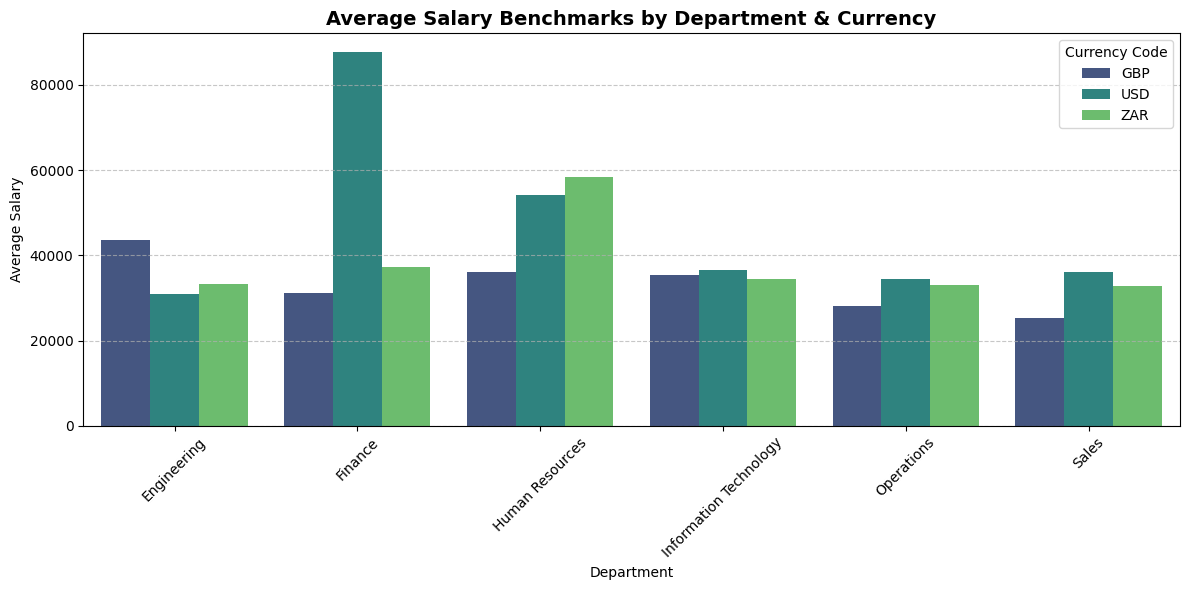


💾 Preparing your cleaned file for download...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [8]:
# =============================================================================
# 📊 HR DASHBOARD: STAFFING AND SALARY TRENDS
# =============================================================================

import matplotlib.pyplot as plt
import seaborn as sns

# --- a. Total Current Staff ---
# How many people are currently working at the company?
# We count everyone where the "Active" status is set to True.
current_headcount = df[df['is_active'] == True].shape[0]

# --- b. Hiring Growth Over Time ---
# Which years were our busiest for hiring?
# We pull the year from the hire date and count how many joined each year.
df['hire_year'] = df['hire_date'].dt.year
hires_by_year = df['hire_year'].value_counts().sort_index()

# --- c. Average Pay by Department and Region ---
# What is the average pay in each department?
# We group by department and currency to see pay scales across different countries.
avg_salary = df.groupby(['department', 'currency'])['salary'].mean().reset_index()

# --- d. Average Length of Employment (Tenure) ---
# How long has the average employee been with us?
# We subtract the hire date from today's date for all current staff.
today = pd.Timestamp.now()
active_staff = df[df['is_active'] == True].copy()
active_staff['tenure_days'] = (today - active_staff['hire_date']).dt.days
median_tenure = active_staff['tenure_days'].median()

# --- e. Staff Turnover Rate ---
# What percentage of our total workforce has left the company?
# This compares the number of people who have left to the total number of records.
total_employees = len(df)
terminated_count = df['exit_date'].notna().sum()
turnover_rate = (terminated_count / total_employees) * 100

# =============================================================================
# 📟 MANAGEMENT SUMMARY REPORT
# =============================================================================
print("╔" + "═" * 58 + "╗")
print("║" + " " * 19 + "HR EXECUTIVE SUMMARY" + " " * 20 + "║")
print("╠" + "═" * 58 + "╣")
print(f"║ 👥 Current Staff Count     : {current_headcount:<29} ║")
print(f"║ ⏳ Typical Staff Tenure    : {int(median_tenure):<5} Days                      ║")
print(f"║ 🔄 Overall Turnover Rate   : {turnover_rate:>6.2f}%                       ║")
print("╚" + "═" * 58 + "╝")

### Heading for Visual: Hiring Trends
print("\n📅 NUMBER OF HIRES EACH YEAR:")
print(hires_by_year.to_string())

### Heading for Visual: Salary Breakdown Table
print("\n💰 AVERAGE SALARY BY DEPARTMENT & CURRENCY:")
display(avg_salary.style.format({'salary': '{:,.2f}'}))

# =============================================================================
# 📈 VISUAL: SALARY COMPARISON GRAPH
# =============================================================================
### Heading for Visual: Salary Benchmarking Chart

plt.figure(figsize=(12, 6))
sns.barplot(data=avg_salary, x='department', y='salary', hue='currency', palette='viridis')
plt.title('Average Salary Benchmarks by Department & Currency', fontsize=14, fontweight='bold')
plt.ylabel('Average Salary')
plt.xlabel('Department')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Currency Code')
plt.tight_layout()
plt.show()

# --- Saving the Data ---
try:
    from google.colab import files
    print("\n💾 Preparing your cleaned file for download...")
    files.download('Week-3-Employee-Data_CLEANED.csv')
except Exception:
    print("\n⚠️ Note: The cleaned file is ready in the 'Files' folder on the left.")

<a id="optional-extras-1"></a>
## 🌟 5.1. Optional Extra: Leadership Analytics
*Objective: Identify top leadership by analyzing team density and span of control.*

--------------------------------------------------
🔝 ORGANIZATIONAL LEADERSHIP DASHBOARD
--------------------------------------------------
👥 Total Managers Tracked : 63
🏢 Largest Team Size      : 7 Reports
--------------------------------------------------


/tmp/ipython-input-1610526625.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_managers, x='Manager ID', y='Direct Reports', palette='mako')


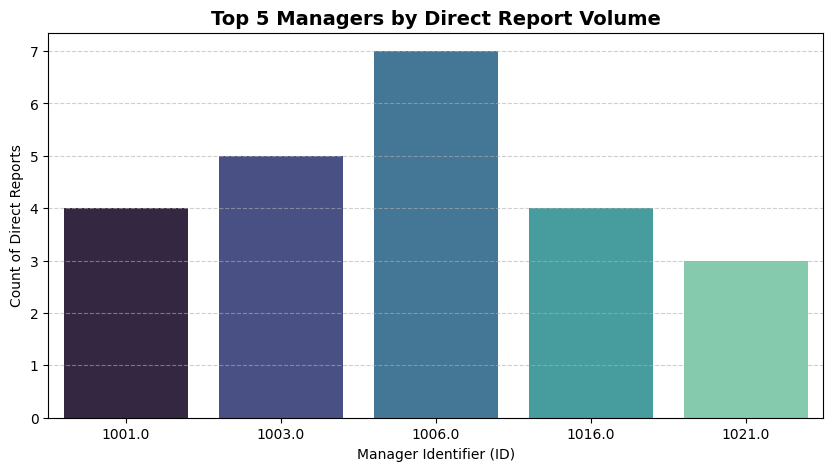


🔍 DETAILED LEADERSHIP BREAKDOWN:


,Manager ID,Direct Reports
0,1006.0,7
1,1003.0,5
2,1001.0,4
3,1016.0,4
4,1021.0,3


In [9]:
# =============================================================================
# 👑 LEADERSHIP ANALYSIS: TOP 5 MANAGERS BY TEAM SIZE
# =============================================================================

# Logic: Group by manager_id and count occurrences to identify the largest teams.
# Note: Manager IDs are used as unique identifiers for leadership.
top_managers = df['manager_id'].value_counts().head(5).reset_index()
top_managers.columns = ['Manager ID', 'Direct Reports']

# --- Professional Output Summary ---
print("-" * 50)
print(f"🔝 ORGANIZATIONAL LEADERSHIP DASHBOARD")
print("-" * 50)
print(f"👥 Total Managers Tracked : {df['manager_id'].nunique()}")
print(f"🏢 Largest Team Size      : {top_managers['Direct Reports'].max()} Reports")
print("-" * 50)

# Visualizing the Top 5 Managers
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.barplot(data=top_managers, x='Manager ID', y='Direct Reports', palette='mako')
plt.title('Top 5 Managers by Direct Report Volume', fontsize=14, fontweight='bold')
plt.ylabel('Count of Direct Reports')
plt.xlabel('Manager Identifier (ID)')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

print("\n🔍 DETAILED LEADERSHIP BREAKDOWN:")
display(top_managers)

--------------------------------------------------
📊 DATA INTEGRITY SCORECARD
--------------------------------------------------
📧 Total Records Analyzed : 150
🚫 Invalid Email Count    : 47
📈 Percent Invalid Emails : 31.33%
--------------------------------------------------


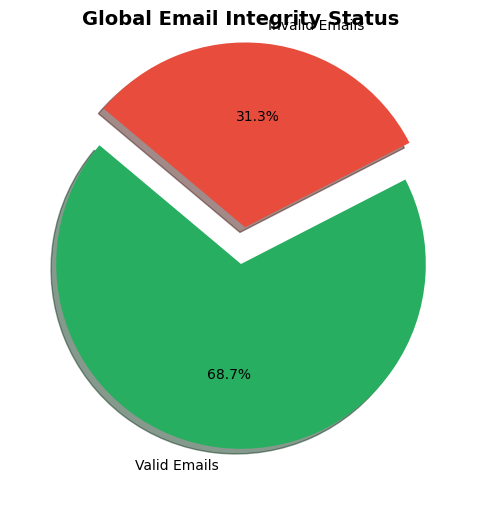

⚠️ ADVISORY: Invalid email rate is above 5%. Manual data verification recommended.


In [10]:
# =============================================================================
# 🛠️ QUALITY AUDIT: TECHNICAL INTEGRITY METRICS
# =============================================================================

# Logic: Using the 'email_valid' flag created in section 3.8 to calculate the
# percentage of records that failed standard syntax validation.
total_records = len(df)
invalid_email_count = (~df['email_valid']).sum()
percent_invalid_emails = (invalid_email_count / total_records) * 100

# --- Professional Output Summary ---
print("-" * 50)
print(f"📊 DATA INTEGRITY SCORECARD")
print("-" * 50)
print(f"📧 Total Records Analyzed : {total_records}")
print(f"🚫 Invalid Email Count    : {invalid_email_count}")
print(f"📈 Percent Invalid Emails : {percent_invalid_emails:.2f}%")
print("-" * 50)

# Visualization: Integrity Gauge (Pie Chart)
plt.figure(figsize=(6, 6))
labels = ['Valid Emails', 'Invalid Emails']
sizes = [total_records - invalid_email_count, invalid_email_count]
colors = ['#27ae60', '#e74c3c']
explode = (0, 0.2)  # Explode the 'Invalid' slice for emphasis

plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        startangle=140, colors=colors, shadow=True)
plt.title('Global Email Integrity Status', fontsize=14, fontweight='bold')
plt.show()

if percent_invalid_emails > 5:
    print("⚠️ ADVISORY: Invalid email rate is above 5%. Manual data verification recommended.")
else:
    print("✅ STATUS: Data integrity is within acceptable operational thresholds.")